In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df= pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df2 = pd.get_dummies(data=df, columns=['Geography','Gender'])
df2.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [ ]:
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [ ]:
cols_to_scale = ['CreditScore','Balance','EstimatedSalary','Age','Tenure']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,1,1,1,0.506735,1,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,3,1,0,0.569654,1,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,2,0,0,0.469120,0,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,0,1,1,0


In [ ]:
X=df2.drop('Exited', axis='columns')
Y=df2['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

In [ ]:
len(X_train.columns)

13

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(50, input_shape=(13,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 4s 3ms/step - loss: 0.4693 - accuracy: 0.8035
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4275 - accuracy: 0.8164
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3967 - accuracy: 0.8304
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3770 - accuracy: 0.8418
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3650 - accuracy: 0.8471
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3572 - accuracy: 0.8530
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3527 - accuracy: 0.8518
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3485 - accuracy: 0.8547
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3430 - accuracy: 0.8591
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3402 - accura

In [ ]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 1s 3ms/step - loss: 0.3705 - accuracy: 0.8465


[0.37048307061195374, 0.8464999794960022]

In [ ]:
y_pred = []
for element in model.predict(X_test):
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.68      0.46      0.55       405

    accuracy                           0.85      2000
   macro avg       0.78      0.70      0.73      2000
weighted avg       0.83      0.85      0.83      2000



Text(114.0, 0.5, 'Truth')

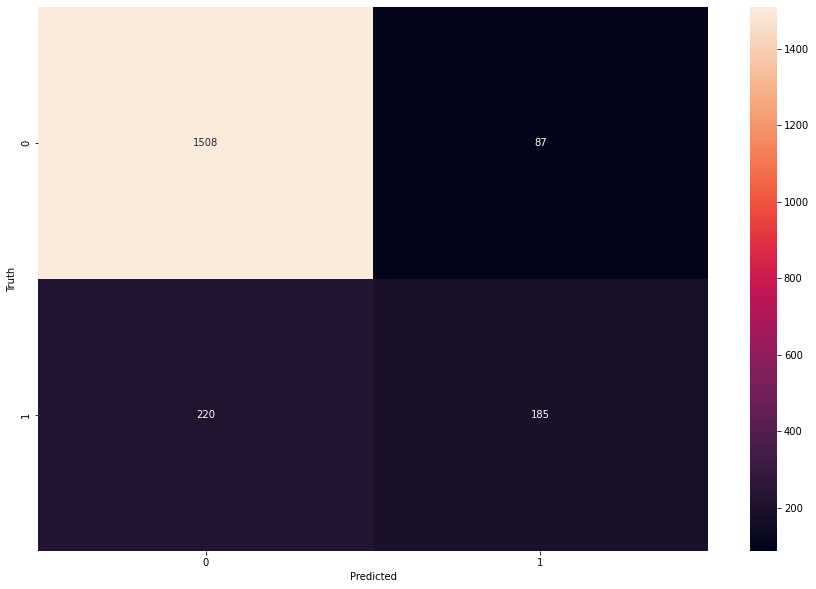

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (15,10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Now if we use SMOTE technique for imbalanced data**



In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, Y)
y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=5)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(50, input_shape=(13,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
399/399 [==============================] - 4s 7ms/step - loss: 0.5986 - accuracy: 0.6798
Epoch 2/100
399/399 [==============================] - 3s 8ms/step - loss: 0.5091 - accuracy: 0.7498
Epoch 3/100
399/399 [==============================] - 3s 9ms/step - loss: 0.4766 - accuracy: 0.7692
Epoch 4/100
399/399 [==============================] - 3s 8ms/step - loss: 0.4613 - accuracy: 0.7780
Epoch 5/100
399/399 [==============================] - 3s 9ms/step - loss: 0.4464 - accuracy: 0.7865
Epoch 6/100
399/399 [==============================] - 4s 9ms/step - loss: 0.4393 - accuracy: 0.7901
Epoch 7/100
399/399 [==============================] - 3s 9ms/step - loss: 0.4340 - accuracy: 0.7932
Epoch 8/100
399/399 [==============================] - 3s 8ms/step - loss: 0.4290 - accuracy: 0.7983
Epoch 9/100
399/399 [==============================] - 3s 7ms/step - loss: 0.4269 - accuracy: 0.7971
Epoch 10/100
399/399 [==============================] - 3s 7ms/step - loss: 0.4219 - accura

In [ ]:
model.evaluate(X_test, y_test)

100/100 [==============================] - 0s 3ms/step - loss: 0.3945 - accuracy: 0.8245


[0.39450347423553467, 0.8245449066162109]

In [ ]:
y_pred = []
for element in model.predict(X_test):
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:20]

[0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1591
           1       0.83      0.81      0.82      1595

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186



Text(114.0, 0.5, 'Truth')

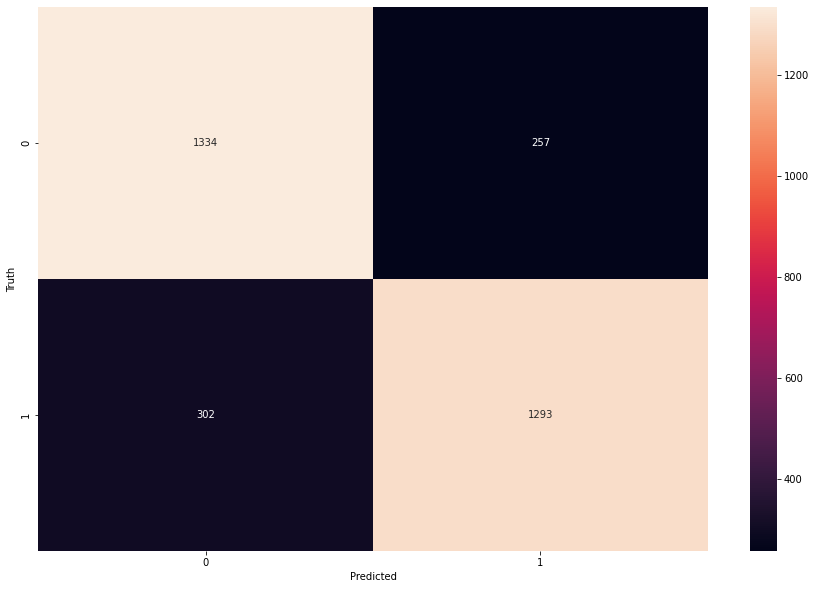

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (15,10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')